# *Title:* Predicting and Classifying The Level of Heart Disease Based on Key Risk Factors

Word count: 2,050

## 1. Introduction

"[Heart disease](https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118) describes a range of conditions that affect your heart" (Mayo Clinic, n.d). "[Several health conditions](https://www.cdc.gov/heartdisease/risk_factors.htm), including your lifestyle (eg. exercise), your age and family history can increase your risk for heart disease" (CDC, 2019). The main health risk factors are: high blood pressure, unhealthy blood cholesterol levels, diabetes and obesity (CDC, 2019). For this project data analysis, we will be focusing on **age, blood pressure and blood cholesterol levels**. 

When are these selected factors risky?
- When [blood pressure](https://www.cdc.gov/bloodpressure/about.htm#:~:text=A%20normal%20blood%20pressure%20level%20is%20less%20than%20120%2F80%20mmHg.&text=No%20matter%20your%20age%2C%20you,pressure%20in%20a%20healthy%20range) is above the normal level of 120/80 mmHg (CDC, 2021)
- When [total cholesterol](https://www.medicalnewstoday.com/articles/315900#recommended-levels) levels are above 200 mg/dL (Weatherspoon, 2020)
    - A person’s serum cholesterol level represents the amount of total cholesterol in their blood

Using the data provided in the [Cleveland dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) (Detrano, 1988), we will try to answer the question: **Given the age, levels of blood pressure, and cholesterol levels of an individual patient, can we predict the presence of heart disease?** (classification)

This data was pulled from a database containing 76 attributes that describe the medical conditions of patients relating to different heart disease risk factors in four different locations. All published experiments, however, refer to using only the Cleveland dataset and a subset of 14 attributes from the 76. We will be reading this "processed" data to pick attributes (Detrano, 1988). To see the full explanation of each of the attributes, please refer to the [Cleveland dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) (Detrano, 1988).

In the dataset the "num" attribute refers to the presence of heart disease in the patient. It is an integer valued from 0 (no presence) to 4 (a value greater than 0 will indicate heart disease and higher numbers indicate worsening levels of heart disease). We will assume that the presence of heart disease is affirmed if the num value is a value that is *not* 0 (Detrano, 1988). 

## 2. Methods & Results

### 2.1 Reading the data into R

This first step includes loading the packages necessary to download the data and run data analysis in R.

In [8]:
#loading packages

library(tidyverse)
library(repr)
library(readxl)
library(rvest)
library(stringr)
library(tidymodels)
library(RColorBrewer)
library(digest)
library(infer)
library(cowplot)
library(digest)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)

The next step is loading the Cleveland dataset (Detrano, 1988) from the web, using the URL below and then using the function `read_csv` to read the data and separate it via commas to produce a table of the data. Lastly, the `rename` function is used to give the columns appropriate titles.  The comments (`#`) below describe each of the column names and what they represent. 

In [9]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

heart_disease_data <- read_csv(url, col_names = FALSE)
        
#renaming columns
#refer to Cleveland dataset for full descriptions of each of the attributes
heart_disease_data <- rename(heart_disease_data,
                            age = X1, # age (in years)
                            sex = X2, # sex (1 = male, 0 = female)
                            chest_pain = X3, # Cp (Chest pain type)
                                                    # -- Value 1: typical angina
                                                   # -- Value 2: atypical angina
                                                   # -- Value 3: non-anginal pain
                                                   # -- Value 4: asymptomatic
                            trestbps = X4, # Trestbps (resting blood pressure (in mm Hg on admission to the hospital))
                            chol = X5, # Chol (serum cholestoral in mg/dl)
                            fbs = X6, #  Fbs (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
                            restecg = X7, # Restecg (restecg: resting electrocardiographic results
                                                # -- Value 0: normal
                                                # -- Value 1: having ST-T wave abnormality (T wave inversions 
                                                     # and/or ST elevation or depression of > 0.05 mV)
                                                # -- Value 2: showing probable or definite left ventricular hypertrophy by 
                                                         #Estes' criteria
                            thalach = X8, # Thalach: maximum heart rate achieved
                            exang = X9,# Exang: exercise induced angina (1 = yes; 0 = no)
                            oldpeak = X10, # Oldpeak: ST depression induced by exercise relative to rest
                            slope = X11, # Slope: the slope of the peak exercise ST segment
                                                # -- Value 1: upsloping
                                                # -- Value 2: flat
                                                # -- Value 3: downsloping
                            ca = X12, # Ca number of major vessels (0-3) colored by flourosopy
                            thal = X13, # Thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
                            hd_presence = X14 # Num: (the predicted attribute - presence of heart disease) num: diagnosis of heart disease (angiographic disease status)
                                                    # -- Value 0: < 50% diameter narrowing
                                                    # -- Value 1: > 50% diameter narrowing

                            )
heart_disease_data

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)



age,sex,chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd_presence
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


*Table 2.1: Cleveland data with renamed columns*

### 2.2 Cleaning and Wrangling data

From the downloaded data (above) the data must now be cleaned and wrangled by using the `mutate` function to assign each column to their appropriate data type for clearer data analysis.

In [10]:
heart_disease_data <- mutate(heart_disease_data,
                            age = as.integer(age, na.rm = TRUE),
                            ca = as.numeric(ca, na.rm = TRUE),
                            thal = as.numeric(thal, na.rm = TRUE),
                            hd_presence = as_factor(hd_presence),
                            fbs = as.integer(fbs, na.rm = TRUE))

heart_disease_data

Warning message:
“Problem with `mutate()` input `ca`.
ℹ NAs introduced by coercion
ℹ Input `ca` is `as.numeric(ca, na.rm = TRUE)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `thal`.
ℹ NAs introduced by coercion
ℹ Input `thal` is `as.numeric(thal, na.rm = TRUE)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


age,sex,chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd_presence
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
38,1,3,138,175,0,0,173,0,0.0,1,NA,3,0


*Table 2.2: Cleveland dataset with correct data type columns*

### 2.3 Summarizing the data

Summarizing the data includes setting the seed, to ensure reproducible randomization of the data, then using the `initial_split` function to create testing and training data to use for classification. Only training data will be used for the exploratory analysis and subsequent analysis.  A summary table will be created to show the tally of each level of heart disease using the `group_by` and `summarize` functions (under the column titled as `n`). Using the same functions and the `mean` function, the means of the relevant variables will be calculated to give an overall sense of the variables of interest. Finally, all columns will be bound and displayed in a summary table.

In [11]:
#setting the seed to ensure consistent randomization
set.seed(1)
#splitting data into training and testing
#"heart disease" will be abbreviated to "hd"

hd_split <- initial_split(heart_disease_data, prop = 0.75, strata = hd_presence)
hd_train <- training(hd_split)
hd_test <- testing(hd_split)

#summarizing the training data by hd_presence (counting the number in each level of heart disease)
num_hd_presence <- hd_train %>%
                        group_by(hd_presence) %>%
                        summarize(n = n()) %>%
                        select(-hd_presence)

#calculating means
means <- hd_train %>%
        group_by(hd_presence) %>%
        summarize(
          mean_age = mean(age, na.rm = TRUE),
            mean_chol = mean(chol, na.rm = TRUE), #chol is (serum cholesterol in mg/dl)
            mean_trestbps = mean(trestbps, na.rm = TRUE))

means

#final summary table of means of selected predictors and the number of hd_presence
summary_table <- bind_cols(means, num_hd_presence)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



hd_presence,mean_age,mean_chol,mean_trestbps
<fct>,<dbl>,<dbl>,<dbl>
0,52.71545,241.2439,128.8293
1,56.57143,252.6905,133.6429
2,57.40741,264.2222,134.6296
3,55.69231,239.9231,132.6538
4,58.20000,254.7000,137.1000


*Table 2.3: Table of selected variable means*

### 2.3.1 Summary Table

In [12]:
summary_table

hd_presence,mean_age,mean_chol,mean_trestbps,n
<fct>,<dbl>,<dbl>,<dbl>,<int>
0,52.71545,241.2439,128.8293,123
1,56.57143,252.6905,133.6429,42
2,57.40741,264.2222,134.6296,27
3,55.69231,239.9231,132.6538,26
4,58.20000,254.7000,137.1000,10


*Table 2.3.1: Summary Table including means and tally*

### 2.3.2 NA Values

The missing or 'Not Available' (NA) values in this dataset can be found using the `na.omit()` function on the whole data set to see how many rows have been removed and the columns it has been removed from (in this case, the `ca` column). Using the `is.na()` function, we can see how many rows within the `ca` column have NA values.

In [13]:
#calculating the number of rows in ca with missing values
#using the na.omit() function we see that 3 rows are removed - by looking at the heart_disease_data, 
#we see that the ca column is the only column with a missing value - thus it has been selected here
na_values <- hd_train %>%
filter(is.na(ca)) %>%
nrow()
#total rows with na values in hd_train
na_values

[1] 3

### 2.4 Visualizing the data

After cleaning and wrangling, we can now visualize the data for a better sense of relationships of the predictors (age, cholesterol levels and blood pressure) and the response variable (the presence of heart disease). First, we created two scatterplots, using the `ggplot` and `geom_point` functions, both with age on the x axes. Age is used because blood cholesterol levels usually worsen as you get older and your risk of high blood pressure tends to rise as you get older as well (CDC, 2019). 

One scatterplot will have blood pressure on the y axis and the other will have the serum cholesterol levels (chol) on the y axis, and both will have the points coloured by level of heart disease to show the relationships between the variables.

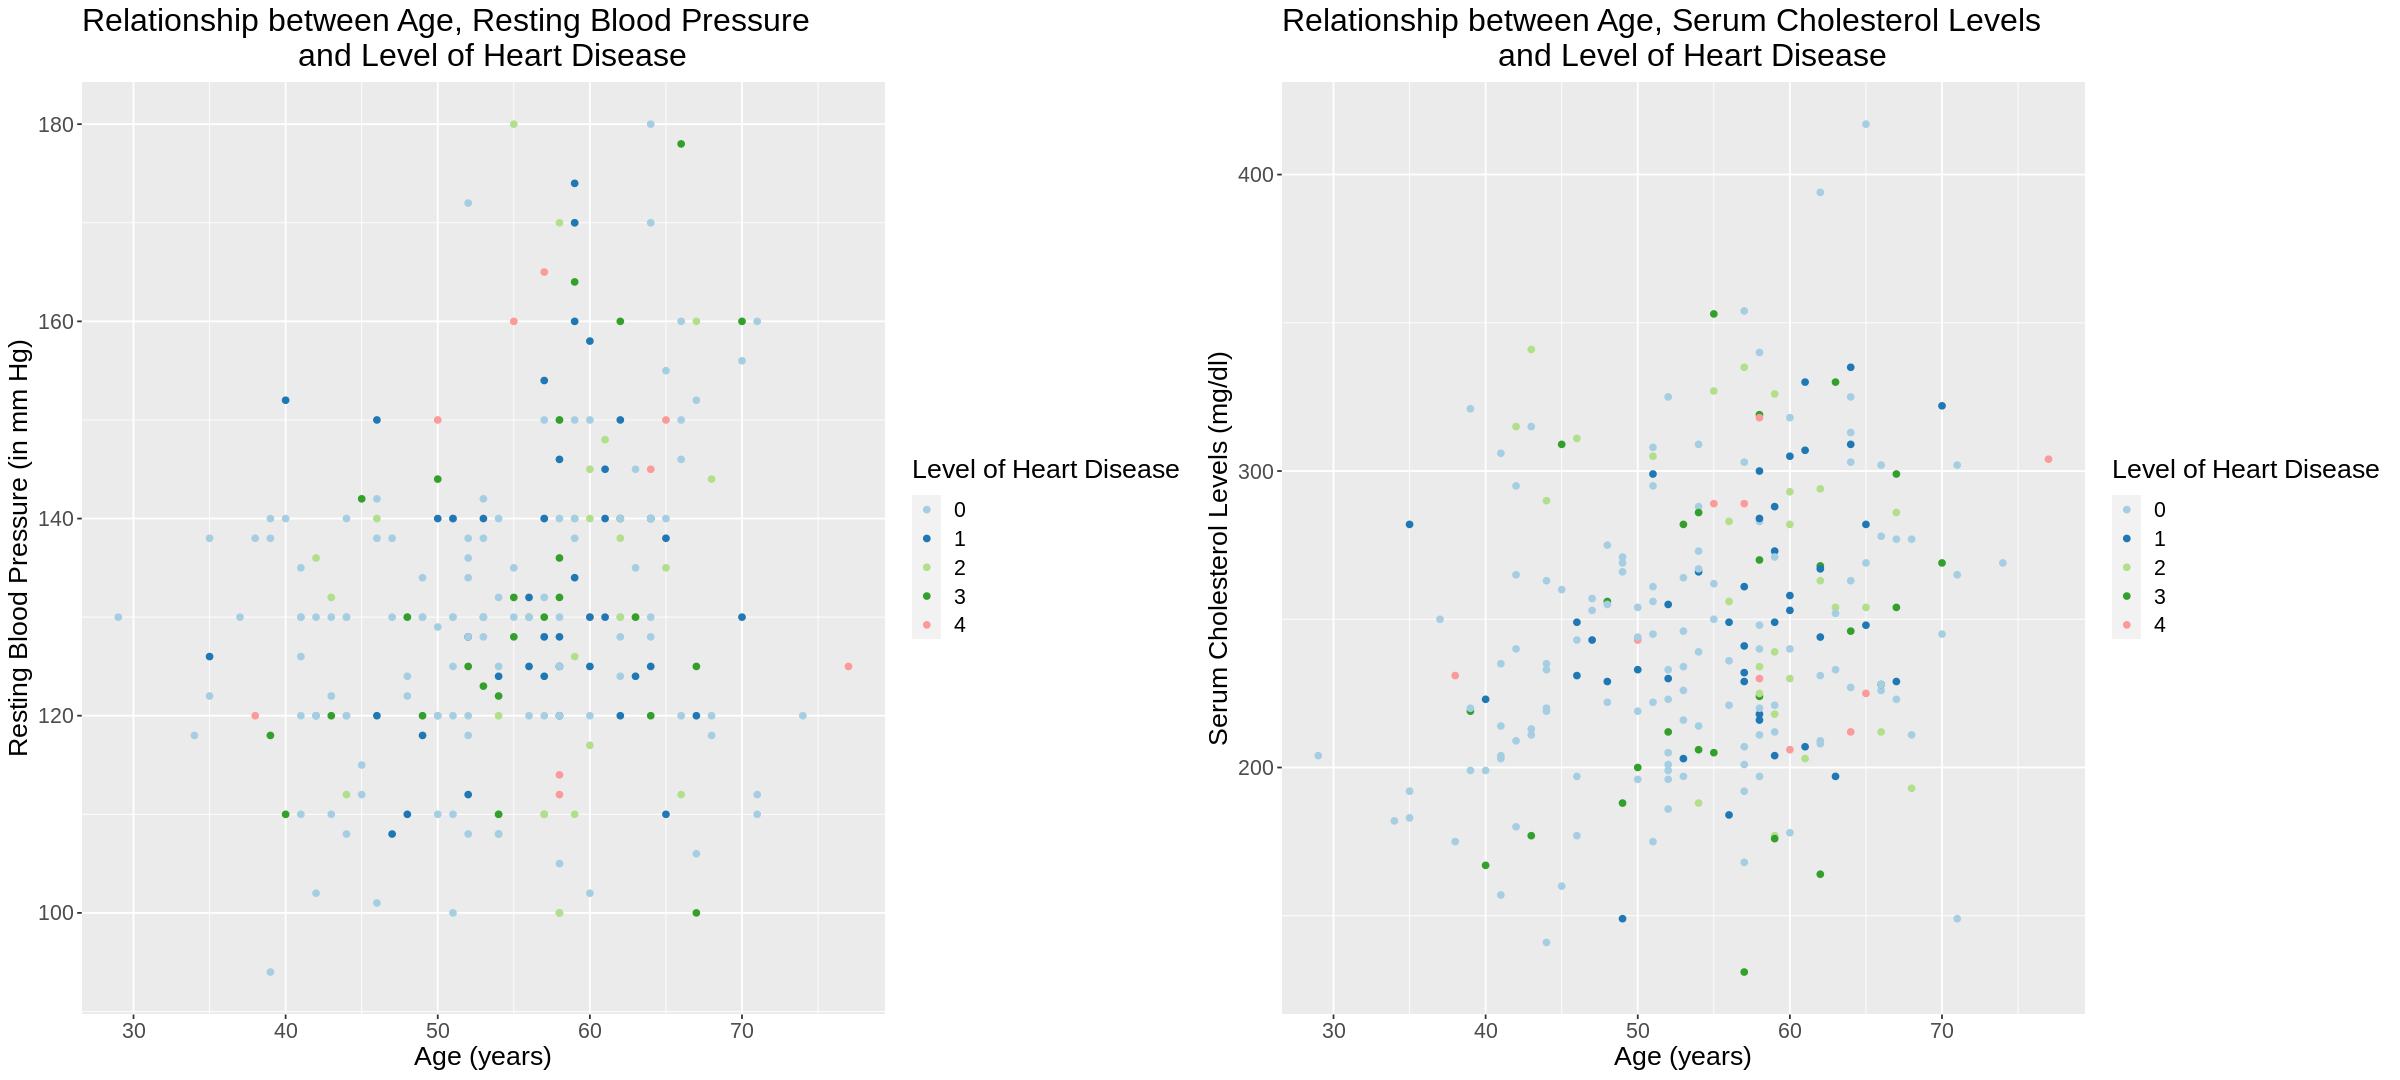

In [14]:
options(repr.plot.width = 20, repr.plot.height = 9) 

scatter_age_trestbps <- ggplot(hd_train, aes(x = age, y = trestbps, color = hd_presence)) +
    geom_point() +
   theme(text = element_text(size = 16))+
    labs(x = "Age (years)", y = "Resting Blood Pressure (in mm Hg)", color = "Level of Heart Disease")+
    ggtitle("Relationship between Age, Resting Blood Pressure 
                        and Level of Heart Disease")+
   scale_color_brewer(palette = "Paired")

scatter_age_chol <- ggplot(hd_train, aes(x = age, y = chol, color = hd_presence)) +
    geom_point() +
    theme(text = element_text(size = 16))+
    labs(x = "Age (years)", y = "Serum Cholesterol Levels (mg/dl)", color = "Level of Heart Disease")+
    ggtitle("Relationship between Age, Serum Cholesterol Levels 
                        and Level of Heart Disease")+
    scale_color_brewer(palette = "Paired")

plot_grid(scatter_age_trestbps, scatter_age_chol, ncol = 2)

*Figure 1 (left): Relationship between Resting Blood Pressure, Age and Level of Heart Disease* 

*Figure 2 (right): Relationship between Serum Cholesterol, Age and Level of Heart Disease*

As can be seen from Figure 1, there appears to be no clear relationship between an increase in age, an increase in blood pressure and level of heart disease. However, there appears to be more points with levels of heart disease above 0 beyond a resting blood pressure of 140mmHg, and more of a concentration of heart disease with levels above 0 around the age of 50-65 years old, but this could be perhaps due to the average age of the participants of the data (~50 years old).

With Figure 2, there appears to be a slightly stronger relationship between age, serum cholesterol levels and levels of heart disease. As age and serum cholesterol levels increase, there seems to be an increase in the level of heart disease as well (beyond 0). Like Figure 1, there seems to be a concentration of higher levels of heart disease around the age of 60.

# 3. Data Analysis

To answer our question, we will be using the **k-nearest neighbors (KNN) classification algorithm** to predict the presence of heart disease. We will use these column attributes as predictors based on our research and exploratory data analysis:
- age 
- trestbps (blood pressure)
- chol (cholesterol levels)
- hd_presence (presence of heart disease - response variable)

In this section, we first use the same seed as before and then we split the data into training and testing data (using the `inital_split` function). To perform cross-validation, we then split our overall training data into 5 evenly sized chunks using the `vfold_cv()` function. We then pre-process the data using the `recipe()` function, specifying that `hd_presence` is the target and `age`, `chol`, and `trestbps` are the predictors. In the same step, we standardize the predictors using the `step_scale` and `step_center` functions. After creating the recipe, we then create a KNN model specification by calling the `nearest_neighbor()` function. In the neighbours argument, we select the `tune()` function to specify that each parameter (the number of neighbors) in the model should be tuned. Then, instead of using `fit` in the `workflow`, we use the `tune_grid` function to fit the model for each value in a range of parameter ($k$) values. To do this, we first create a data frame with a neighbors variable that contains the sequence of values of $k$ to try (from 1 to 100 and stepping by 5) by using the `tibble` and `seq` function. Then we pass that data frame to the grid argument of tune_grid (Timbers et al., 2021).

Lastly, from the workflow results, we `filter` for the accuracy metric to determine the accuracy of our classifier.

In [15]:
#setting the same seed (1)
set.seed(1)

#re-using split data
hd_split <- initial_split(heart_disease_data, prop = 0.75, strata = hd_presence)
hd_train <- training(hd_split)
hd_test <- testing(hd_split)

# 5 fold
hd_vfold <- vfold_cv(hd_train, v = 5, strata = hd_presence)

#recipe

hd_recipe <- recipe(hd_presence ~ age + chol + trestbps, data = hd_train) %>%
                    step_scale(all_predictors()) %>%
                    step_center(all_predictors())

# knn specification

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
                set_engine("kknn") %>%
                set_mode("classification")

# k values
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))


# fitting vfold to workflow
knn_results <- workflow() %>%
  add_recipe(hd_recipe) %>%
  add_model(knn_spec) %>%
  tune_grid(resamples = hd_vfold, grid = k_vals) %>%
  collect_metrics() 

accuracies <- knn_results %>%
  filter(.metric == "accuracy") 

accuracies


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.3940711,5,0.03926097,Model01
6,accuracy,multiclass,0.4381423,5,0.03431800,Model02
11,accuracy,multiclass,0.5092885,5,0.03221647,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
86,accuracy,multiclass,0.5395257,5,0.004463079,Model18
91,accuracy,multiclass,0.5395257,5,0.004463079,Model19
96,accuracy,multiclass,0.5395257,5,0.004463079,Model20


*Table 3.1: Accuracy table for the KNN model using the training data*

To show the optimal $k$ value in the table, the means (which is the accuracy measure) of the first 6 $k$ values is shown in descending order.

In [25]:
selected_k <- accuracies %>%
            arrange(desc(mean)) %>%
            head()
selected_k

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
16,accuracy,multiclass,0.5484190,5,0.030369907,Model04
41,accuracy,multiclass,0.5395257,5,0.004463079,Model09
46,accuracy,multiclass,0.5395257,5,0.004463079,Model10
51,accuracy,multiclass,0.5395257,5,0.004463079,Model11
56,accuracy,multiclass,0.5395257,5,0.004463079,Model12
61,accuracy,multiclass,0.5395257,5,0.004463079,Model13


*Table 3.2: Accuracy table of $k$ values in descending order*


To better visualize and select the optimal $k$ value, we plot the accuracy versus $k$ below. When selecting $k$, we looked for a value of $k$ where we got roughly optimal accuracy, a value where changing the value to a nearby one didn't decrease the accuracy much (so our choice is reliable in the presence of uncertainty) and lastly, a value that doesn't have a very high computation cost (Timbers et al., 2021).

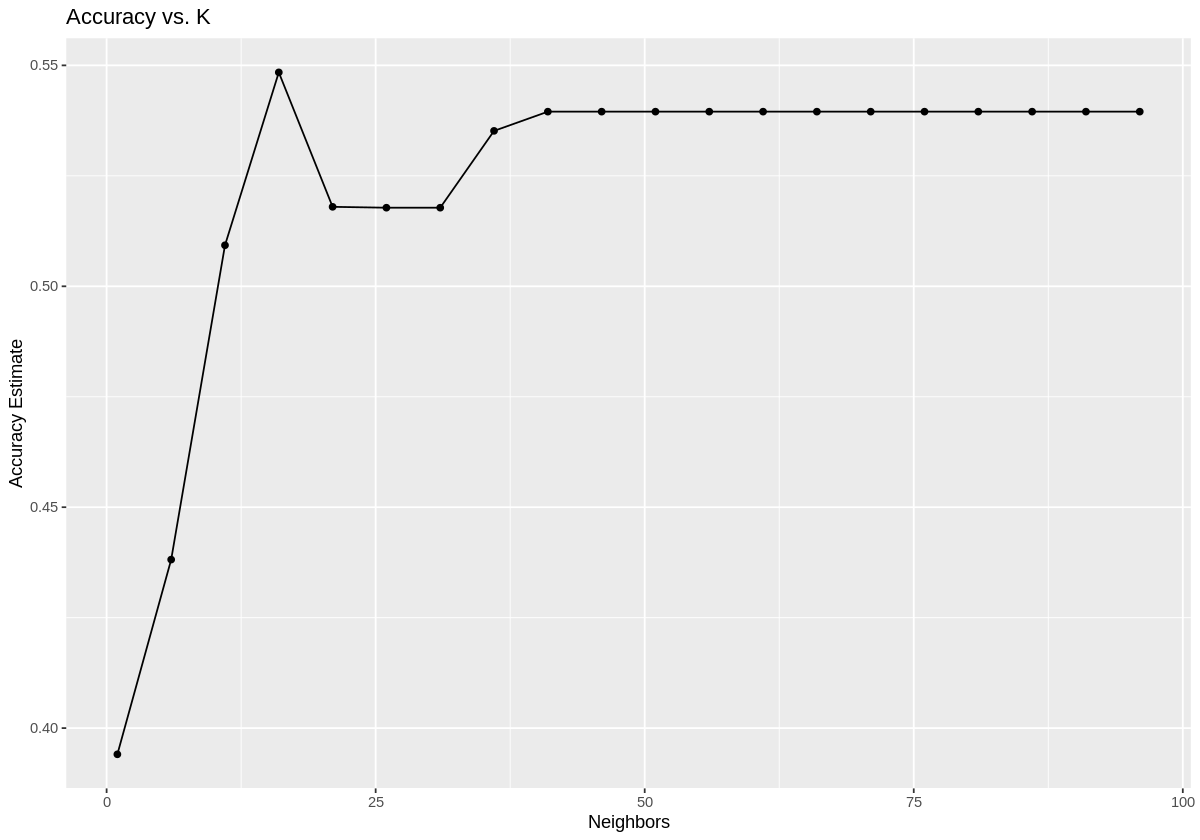

In [17]:
options(repr.plot.width = 10, repr.plot.height = 7) 
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
    ggtitle("Accuracy vs. K")

accuracy_vs_k

*Figure 3: Accuracy versus $k$ plot*

From this plot and our criteria, we chose the optimal value of $k$ = 16 as it has the highest accuracy measure and lowest computation cost, though our choice may be  unreliable as the difference in values around 16 is quite high.


The last step is to input the optimal value of $k$ and use it in our new KNN model specification. We then put the new model into a workflow and `fit` the model to the training data. Once fitted, the model is then used to `predict()`on the **test data**. Lastly, we `filtered` the predictions table for accuracy to get the accuracy estimate of our classifier on our test data.

In [19]:
options(repr.matrix.max.rows = 10)

knn_spec_k <- nearest_neighbor(weight_func = "rectangular", neighbors = 16) %>%
  set_engine("kknn") %>%
  set_mode("classification")

knn_fit <- workflow() %>%
  add_recipe(hd_recipe) %>%
  add_model(knn_spec_k) %>%
  fit(data = hd_train)

hd_test_predictions <- predict(knn_fit, hd_test) %>%
  bind_cols(hd_test) %>%
   select(.pred_class, age, trestbps, chol, hd_presence)

hd_test_predictions

accuracy_test <- hd_test_predictions %>%
  metrics(truth = hd_presence, estimate = .pred_class) %>%
  filter(.metric == "accuracy")

accuracy_test

.pred_class,age,trestbps,chol,hd_presence
<fct>,<int>,<dbl>,<dbl>,<fct>
0,56,140,294,0
0,64,110,211,0
0,43,150,247,0
0,69,140,239,0
0,59,135,234,0
⋮,⋮,⋮,⋮,⋮
0,55,132,342,0
0,44,120,169,2
0,63,140,187,2


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5466667


*Table 3.3 (above): Table of the test data with the selected variables, the predicted class and the response variable*

*Table 3.4 (below): Table of the accuracy of the test prediction*

Already, as can be seen from Table 3.3, a significant number of rows have an incorrect .pred_class of 0 compared to the true hd_presence value. The low accuracy of the classifer is further cemented through Table 3.4 which shows a low overall accuracy estimate of ~54.6% for the classifier on the test data.

## 3.1 Visualization of Data Analysis

The final component of data analysis is visualizing the data. To visualize KNN model and the predictors, we used the same scatterplots from our exploratory data analysis and overlayed a made-up point (`new_point`) to show how our model would classify a random data point.

First, we created a `new_point` with random age, blood pressure levels and cholesterol levels, but with values that still fell within the range of the training values. We then passed this new point into the `predict()` function with our KNN model.

In [20]:
new_point <- tibble(age = 60, trestbps = 157, chol = 350)
new_point

predict(knn_fit, new_point)

age,trestbps,chol
<dbl>,<dbl>,<dbl>
60,157,350


.pred_class
<fct>
2


*Table 3.1.1 (above): Tibble of the new data point*

*Table 3.1.2 (below): Tibble of predicted class of the new point*

Below, we used the same scatterplots as from the exploratory data analysis and overlayed the new point on both plots, denoted as a black point with the .pred_class label of 2.

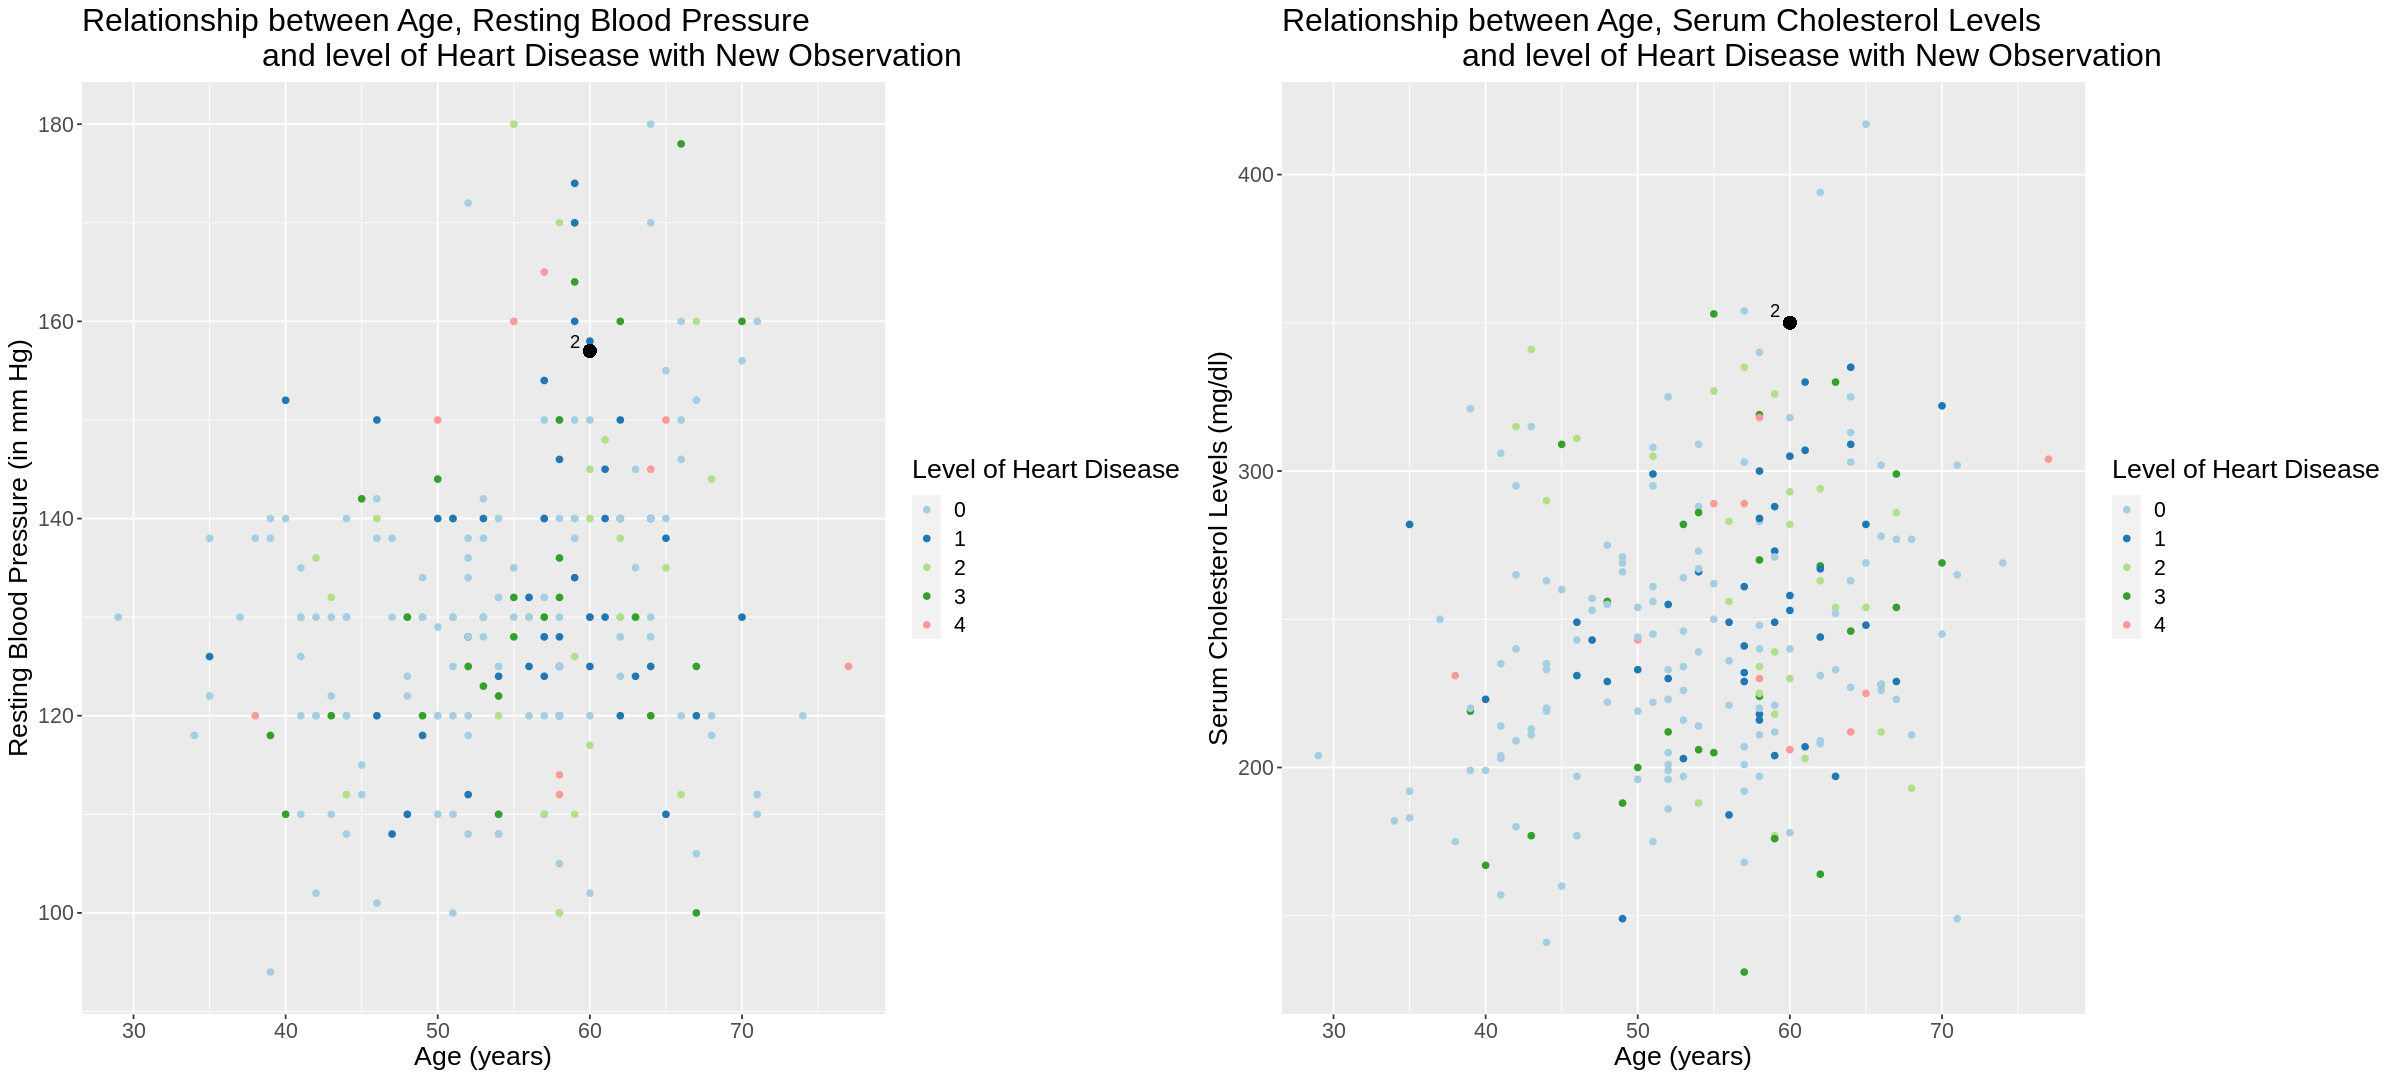

In [21]:
options(repr.plot.width = 20, repr.plot.height = 9) 

scatter_age_trestbps <- ggplot(hd_train, aes(x = age, y = trestbps, color = hd_presence)) +
    geom_point() +
   theme(text = element_text(size = 16))+
    labs(x = "Age (years)", y = "Resting Blood Pressure (in mm Hg)", color = "Level of Heart Disease")+
    ggtitle("Relationship between Age, Resting Blood Pressure 
                    and level of Heart Disease with New Observation")+
   scale_color_brewer(palette = "Paired")

trestbps_scatter_newpoint <- scatter_age_trestbps + geom_point(aes(x = 60, y = 157), color = "black", size = 3) + 
                                        annotate("text", x = 59, y = 158, label = "2")

scatter_age_chol <- ggplot(hd_train, aes(x = age, y = chol, color = hd_presence)) +
    geom_point() +
    theme(text = element_text(size = 16))+
    labs(x = "Age (years)", y = "Serum Cholesterol Levels (mg/dl)", color = "Level of Heart Disease")+
    ggtitle("Relationship between Age, Serum Cholesterol Levels 
                    and level of Heart Disease with New Observation")+
    scale_color_brewer(palette = "Paired")

chol_scatter_newpoint <- scatter_age_chol + geom_point(aes(x = 60, y = 350), color = "black", size = 3)+
                                    annotate("text", x = 59, y = 354, label = "2")

plot_grid(trestbps_scatter_newpoint, chol_scatter_newpoint, ncol = 2)

*Figure 4 (left): Relationship between Resting Blood Pressure, Age and Level of Heart Disease with new point*

*Figure 5 (right): Relationship between Serum Cholesterol, Age and level of Heart Disease with new point*

(plots discussed in the following section)

# 4. Discussion

From our final visualization plots (Figure 4 and Figure 5) which used our KNN model, we can see how the model would have predicted the new random point as 2 (presence of heart disease). Eyeballing the graph, the majority of points in proximity to the new black point in Figure 4 seem to be points that have a level of heart disease greater than 0, and it looks like the majority of the points surrounding the black point in Figure 5 are individuals who have a level of heart disease of 1 or 2. As the KNN model uses the closest points to predict the class of a new point, from these plots we can see the influence of the surrounding points on classifying the new point as 2. 

Based on the random variable values chosen for the new point and our knowledge of the risk factors, with an older age (60 years), a blood pressure level of 157 mmHg (above the normal level of 120/80 mmHg) and a high total cholesterol value of 350mg/dl (above the normal 200 mg/dl), one would expect there to be a presence of heart disease (a classification level greater than 0). Passing the new point through the $k$ nearest neighbours fit yielded a predicted class of 2, indicating a presence of heart disease, which is what we expected. However, due to the overall low level of accuracy of our classifier, 54.6%, this result is relatively unreliable and concrete inferences cannot be made from it. With such a low level of accuracy classification, our model is no better than guessing the classification, as there's around a 50% chance you will choose the correct classification. 

From the exploratory data analysis, we thought there was a moderate correlation between the variables and the response variable, but based on our findings and our low classification level, there seems to be **not enough** correlation between age, cholesterol, and resting blood pressure to accurately predict the presence of heart disease. We expected a higher level of accuracy from our classifier, as the predictors that we chose are known to be risk factors for the presence of heart disease. 

We might infer that the low level of accuracy might be due to the fact that we either used too many predictors or not enough, or that it is simply hard to predict levels of heart disease, even with known risk factors as it varies from person to person and involves many factors. For example, cholesterol is more complicated as it is actually measured in 3 categories - total cholesterol, LDL ("bad cholesterol") and HDL ("good cholesterol). It is recommended that total and LDL cholesterol levels should be kept low, however having more HDL cholesterol can offer some protection against developing heart-related illnesses, thus high total cholesterol may actually be a good thing if it is high levels of HDL (Weatherspoon, 2020). In sum, predicting heart disease is complex as it is specific to the individual and takes into account many factors.

Future explorations may want to include more or less risk factor predictors (eg. sex or exercise levels) to see if that improves the classifer's accuracy. Future studies may also want to examine the correlation of one or two variables, eg. using linear or k-nearest neighbour regression analysis to see if these risk factors actually do have a statistically significant relationship with the presence of heart disease. 

# 5. References

CDC. (2019, Dec 9). *Heart Disease*. Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/risk_factors.htm

CDC. (2021, May 18). *High Blood Pressure*. Centers for Disease Control and Prevention. https://www.cdc.gov/bloodpressure/about.htm 

Detrano, R. (1988). *Heart Disease Data Set* [Data Set]. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation. https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Mayo Clinic. (n.d). *Heart Disease*. Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118

Timbers, T-A., Campbell, T. & Lee, M. (2021). *Data Science: A First Introduction*. GitHub. https://ubc-dsci.github.io/introduction-to-datascience/

Weatherspoon, D. (2020, Jan 5). *What should my cholesterol level be at my age?*. Medical News Today. https://www.medicalnewstoday.com/articles/315900